In [21]:
import os 
import json 

def load_json_data(json_file):
    """加载JSON数据"""
    try:
        with open(json_file, 'r', encoding='utf-8') as f:
            return json.load(f)
    except Exception as e:
        print(f"加载JSON文件时出错: {e}")
        return {}

json_file="/data/home/libo/work/DataFactory/results/4o_pk_o4_mini_v3/component_consistency_results.json"
json_data = load_json_data(json_file)
    

In [22]:
all_data = []
for image_name, data in json_data.items():
    component_details=data["component_details"]
    components = data["components"]
    for component_name, component_data in component_details.items():
        eval_result = component_data["eval_result"]
        better_model = eval_result["better_model"]
        score_details= eval_result["score_details"]
        consistency_score= eval_result["consistency_score"]
        all_data.append([image_name,len(components),component_name,better_model,consistency_score,score_details])
all_data[0:5]

[['1.jpg', 5, 'Servo Demodulator', 'model2', 100, [2, 2, 2, 100]],
 ['1.jpg', 5, 'A/D', 'model2', 100, [2, 2, 2, 100]],
 ['1.jpg', 5, 'DSP', 'model2', 100, [2, 2, 2, 100]],
 ['1.jpg', 5, 'D/A', 'model2', 100, [2, 2, 2, 100]],
 ['1.jpg', 5, 'Actuator Driver', 'model2', 100, [2, 2, 2, 100]]]

In [23]:
import pandas as pd
df = pd.DataFrame(all_data, columns=['image_name', 'component_count', 'component_name', 'better_model', 'consistency_score', 'score_details'])
df.to_csv('../.cache/component_consistency_results.csv', index=False)


<Axes: >

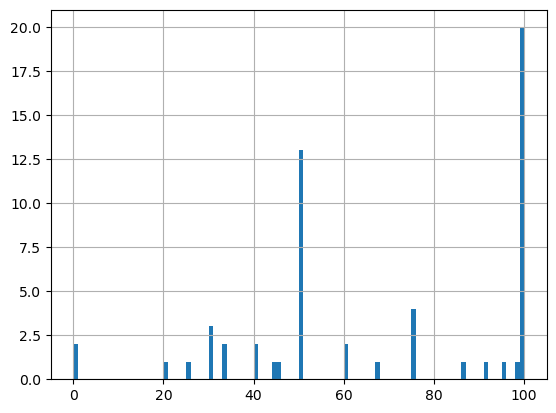

In [24]:
df.consistency_score.hist(bins=100)

In [29]:
# 计算>95分的占比
P95= df[df.consistency_score > 95].shape[0] / df.shape[0]
# 计算>90分的占比
P90= df[df.consistency_score > 90].shape[0] / df.shape[0]
# 计算>85分的占比
P85= df[df.consistency_score > 85].shape[0] / df.shape[0]
# 计算>80分的占比
P80= df[df.consistency_score > 80].shape[0] / df.shape[0]


print( P95
      ,P90
      ,P85
      ,P80)


0.3684210526315789 0.40350877192982454 0.42105263157894735 0.42105263157894735


<Axes: >

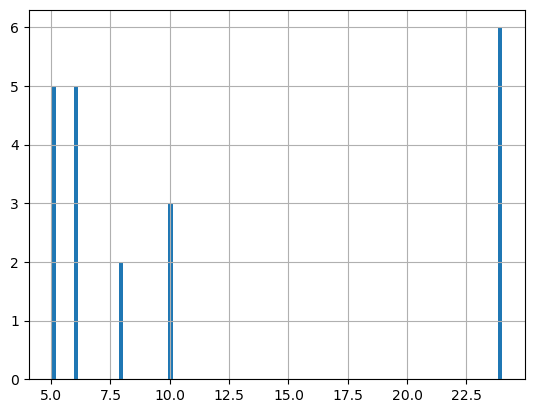

In [32]:
df[df.consistency_score > 95].component_count.hist(bins=100)

In [33]:
df[df.consistency_score > 95].component_count.value_counts()

component_count
24    6
5     5
6     5
10    3
8     2
Name: count, dtype: int64